In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

## 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [12]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [14]:
stats.poisson(2).sf(3)

0.14287653950145296

In [15]:
stats.poisson(2).sf(1)

0.5939941502901616

Text(0.5, 0, 'Cars in drivethru')

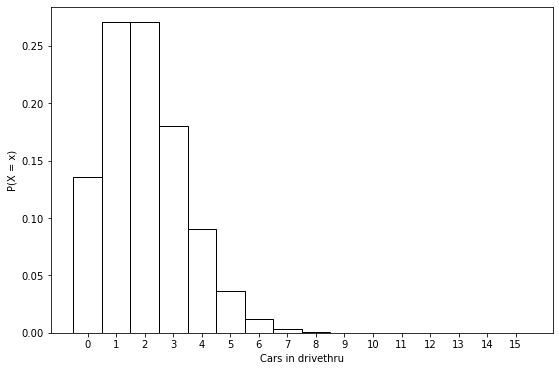

In [21]:
x = range(16)
y = stats.poisson(2).pmf(x)
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('P(X = x)')
plt.xlabel('Cars in drivethru')

## 2 
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [25]:
sales = stats.norm(3, .3)

sales.ppf(.95)

3.4934560880854417

In [27]:
sales.ppf(.15)

2.689069983151863

In [32]:
(sales.ppf(2/10),sales.ppf(3/10))

(2.7475136299281258, 2.842679846187588)

2.8 would qualify

In [39]:
sales.cdf(3.5)*100

95.22096477271853

## 3
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?